**Lab Assignment : 04** <br>
**ID : 2215151024**

**Tasks :** <br>
Generate two sets of from a normal distribution and perform a two-sample t-test.

1. Randomly generate 50 values from a normal distribution with
   a chosen mean (μ1) and standard deviation.
2. Randomly generate 50 values from a normal distribution with a
   different mean (μ2) and standard deviation.

Use and determine whether the means differ significantly.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Mean of Sample A: 50.76
Mean of Sample B: 57.45
t-Statistic: -3.18
Degrees of Freedom: 107.68
p-Value: 0.0019
Confidence Interval of Mean Difference: [-10.85, -2.52]


Reject the null hypothesis. The means are significantly different.


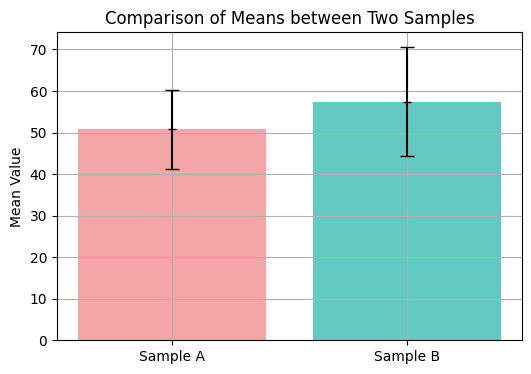

In [16]:
mean_1, std_dev_1 = 50, 10
mean_2, std_dev_2 = 55, 12

sample_a = np.random.normal(loc=mean_1, scale=std_dev_1, size=60)
sample_b = np.random.normal(loc=mean_2, scale=std_dev_2, size=60)

test_statistic, p_value_result = stats.ttest_ind(sample_a, sample_b, equal_var=False)

mean_difference = np.mean(sample_a) - np.mean(sample_b)
se_error = np.sqrt(np.var(sample_a, ddof=1)/len(sample_a) + np.var(sample_b, ddof=1)/len(sample_b))

numerator = (se_error**4)
denominator = ((np.var(sample_a, ddof=1)/len(sample_a))**2 / (len(sample_a)-1) +
               (np.var(sample_b, ddof=1)/len(sample_b))**2 / (len(sample_b)-1))
df_value = numerator / denominator

conf_interval = stats.t.interval(0.95, df_value, loc=mean_difference, scale=se_error)

print(f"Mean of Sample A: {np.mean(sample_a):.2f}")
print(f"Mean of Sample B: {np.mean(sample_b):.2f}")
print(f"t-Statistic: {test_statistic:.2f}")
print(f"Degrees of Freedom: {df_value:.2f}")
print(f"p-Value: {p_value_result:.4f}")
print(f"Confidence Interval of Mean Difference: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]")
print('\n')

alpha_level = 0.05
if p_value_result < alpha_level:
    print("Reject the null hypothesis. The means are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means are not significantly different.")

plt.figure(figsize=(6, 4))
plt.bar(['Sample A', 'Sample B'], [np.mean(sample_a), np.mean(sample_b)], color=['lightcoral', 'lightseagreen'], alpha=0.7)
plt.errorbar(['Sample A', 'Sample B'], [np.mean(sample_a), np.mean(sample_b)],
             yerr=[np.std(sample_a, ddof=1), np.std(sample_b, ddof=1)], fmt='k_', capsize=5)
plt.title('Comparison of Means between Two Samples')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()
